In [1]:
import torch

In [2]:
torch.cuda.is_available()

True

In [3]:
from torchvision import models #import pretrained models

In [4]:
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 '

In [5]:
alexnet = models.AlexNet() 

In [6]:
resnet = models.resnet101(pretrained = True) #Download 101 layer CNN 

In [7]:
resnet  #printed below are modules of the resnet instance

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [8]:
#resnet variable can be called as a function... 

In [9]:
#can take input of 1+ images.. but before we must pre process images to size and normalize pixel values

In [10]:
from torchvision import transforms

In [11]:
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[.485, .456, .406],
            std=[.229, .224, .225]
        )])

In [12]:
#scale to 256 x256
#crop 224x224 around center
#transform to tensor --->Pytorch MD array
#normalize RGB pixels to have deefined means and std --> must match to pretrained network when it was training

In [13]:
from PIL import Image #load image through Pillow

In [14]:
img = Image.open("../data/ren.jpg")

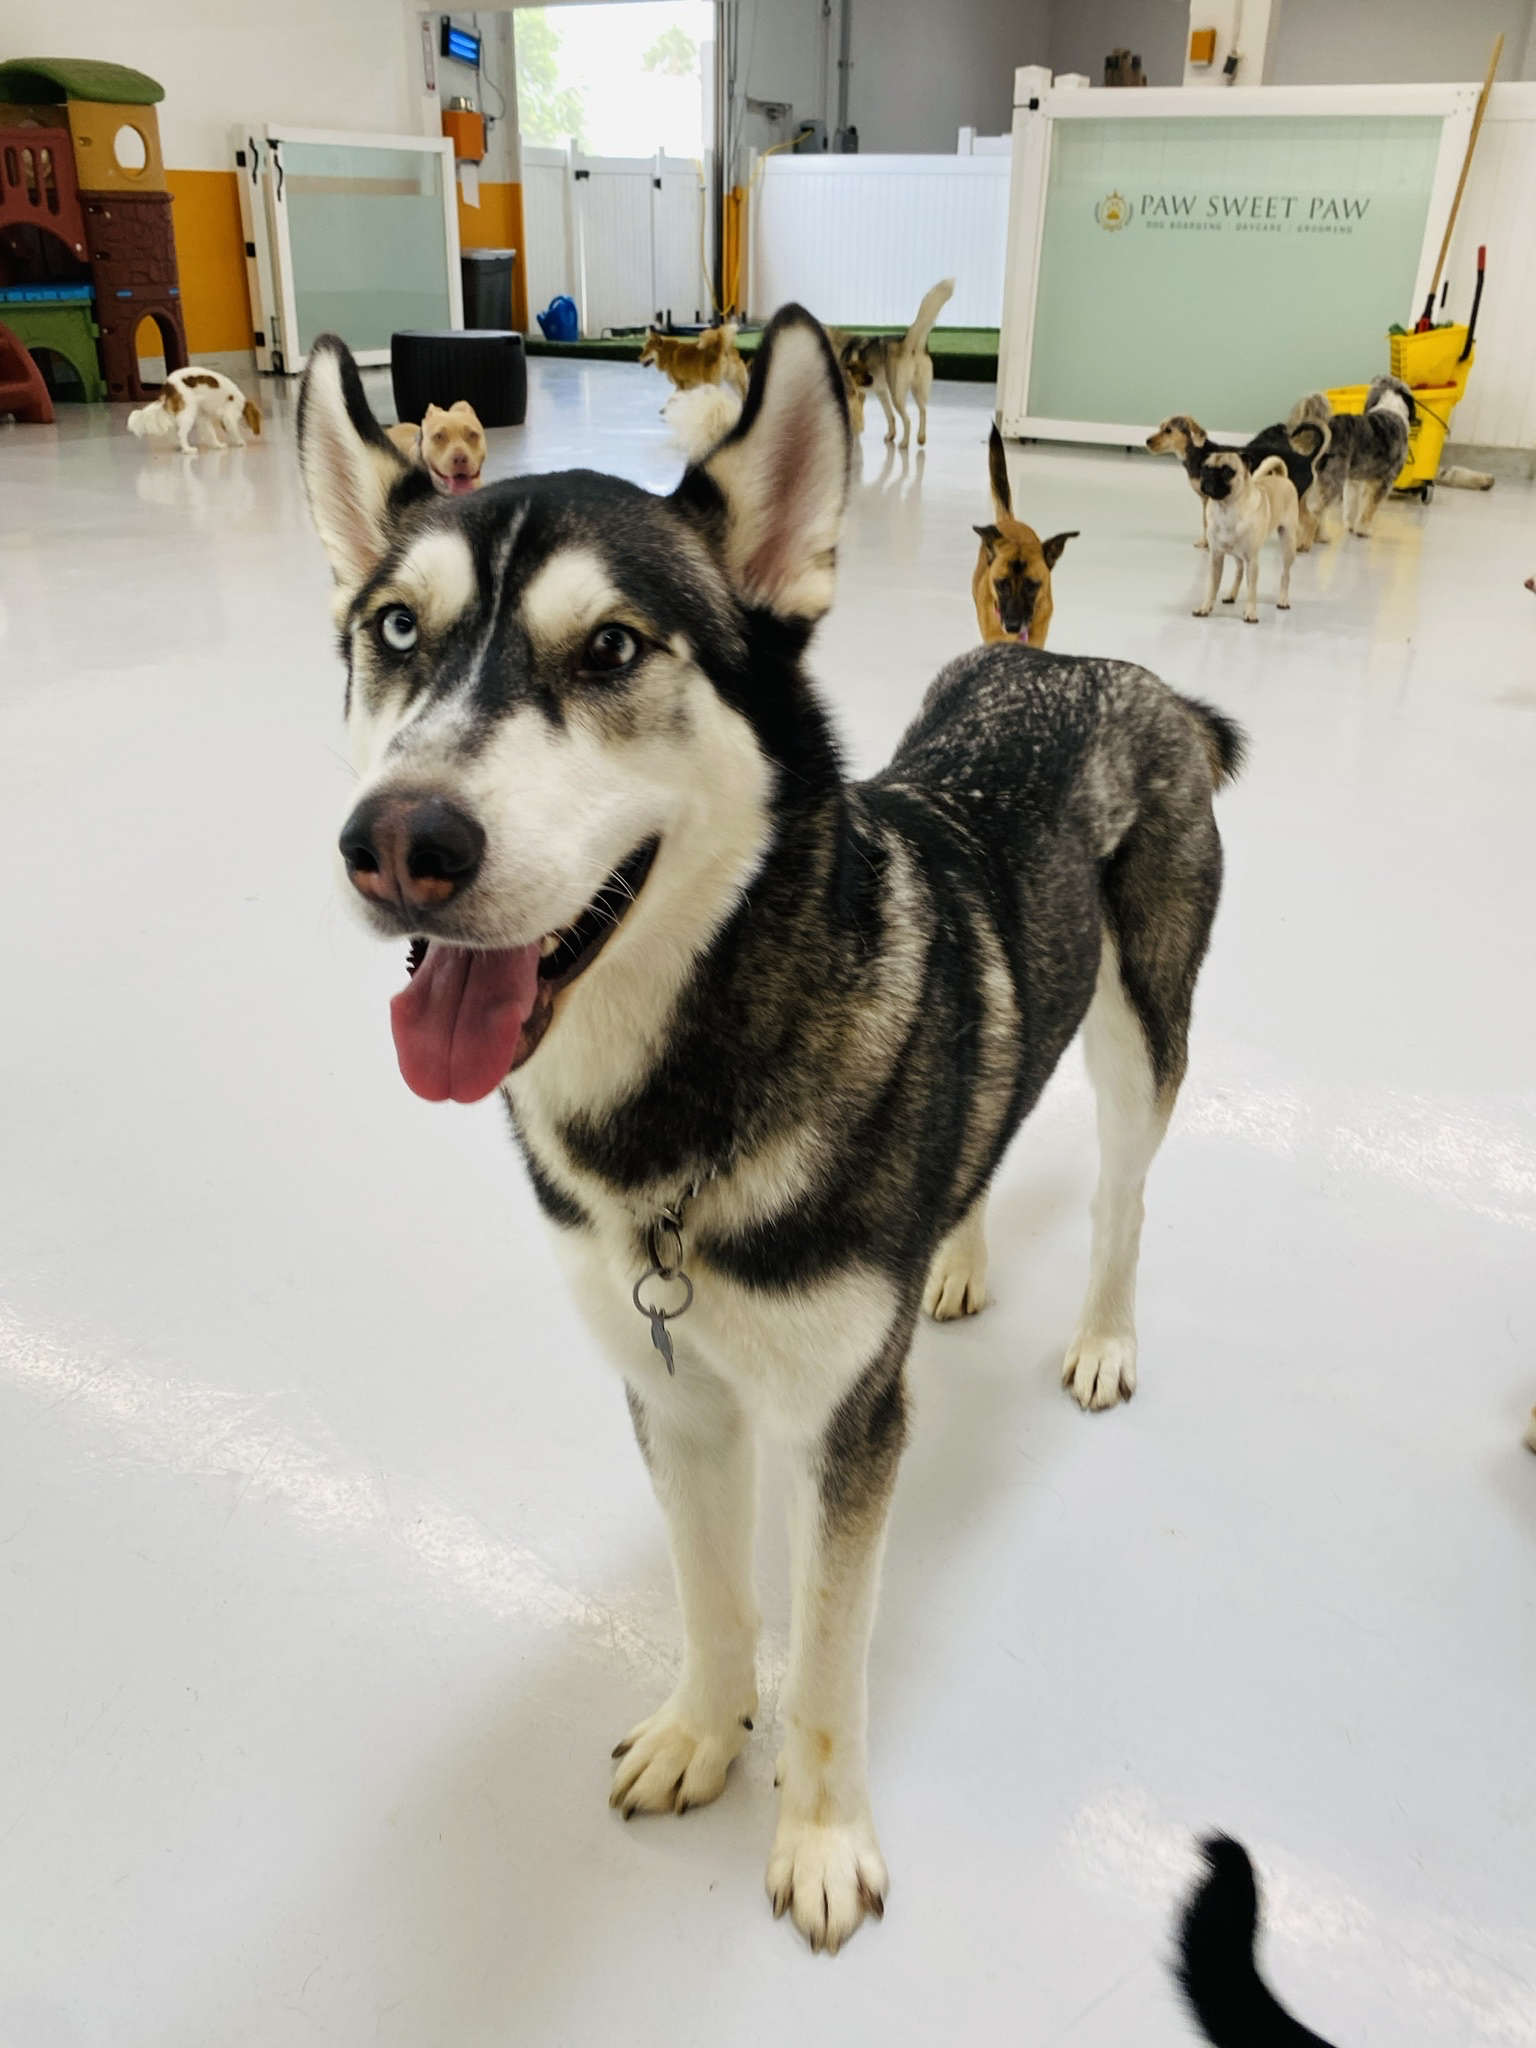

In [15]:
img

In [16]:
img_t = preprocess(img)

In [17]:
import torch

In [18]:
batch_t = torch.unsqueeze(img_t, 0)

In [19]:
resnet.eval() #put CNN into eval mode ~~ "called an inference"

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [20]:
out = resnet(batch_t)

In [21]:
out #scores for every label of .txt file 

tensor([[-2.1086e+00, -4.7024e-01, -1.7235e+00, -9.2661e-01, -3.3988e+00,
          9.9778e-01, -1.6146e+00, -8.8794e-01, -7.3949e-01, -1.0374e+00,
          2.9658e-01, -1.9703e-01, -1.9081e+00,  9.0148e-01, -3.8733e+00,
         -2.7495e+00,  4.8730e-02, -1.9813e+00, -3.2719e+00, -5.7076e-01,
         -4.3663e+00, -2.6718e+00, -2.9448e+00, -1.2979e+00, -2.2373e+00,
         -3.0756e+00, -1.6334e+00, -3.2539e+00, -7.3920e-01, -7.0781e-01,
         -4.9833e-01, -2.5816e+00, -1.7487e+00, -6.3096e-01, -1.4894e+00,
         -8.9944e-01,  5.0174e-01, -2.5231e+00, -3.9368e-01, -2.7640e+00,
         -2.6333e+00, -8.4621e-01, -1.1392e+00, -2.4163e+00, -1.6888e+00,
         -1.7573e+00, -1.8354e+00, -1.1918e+00, -3.7646e+00, -2.6290e+00,
         -1.9029e+00,  1.2136e+00, -1.5355e+00, -1.6862e+00, -1.4699e+00,
         -2.7151e+00, -1.0408e+00,  2.0580e-01, -1.4348e+00, -2.3219e+00,
          2.0908e-01, -1.0154e+00, -1.4905e+00,  2.0822e-01, -1.4637e+00,
         -1.2448e+00, -6.6458e-02, -4.

In [22]:
with open('../data/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()] 

In [23]:
#open up file with labels in same order as when CNN was training

In [24]:
_, index = torch.max(out, 1) #index is not an int value but 1D tensor

In [25]:
# torch.max(input(tensor), dim~~dimension to reduce, keepdim~~ default false)

In [26]:
#torch.max returns a tuple (values, indices)

In [27]:
#values is max value of each row but we set dim = 1, indices is location of that max value

In [28]:
percentage = torch.nn.functional.softmax(out, dim = 1)[0] * 100 #normalize probabilities from out to [0,1] interval

In [29]:
labels[index[0]], percentage[index[0]].item() #print CNN answer with probability

('Eskimo dog, husky', 74.3199234008789)

In [30]:
_, indices = torch.sort(out, descending = True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]] #print top 5 answers

[('Eskimo dog, husky', 74.3199234008789),
 ('dogsled, dog sled, dog sleigh', 12.989818572998047),
 ('Siberian husky', 12.241328239440918),
 ('malamute, malemute, Alaskan malamute', 0.34458303451538086),
 ('timber wolf, grey wolf, gray wolf, Canis lupus', 0.03003121167421341)]